# Task 1

Christoph's task:

* Load 2FHL data
* Make a source counts image - fill events into a sky image, show the "cluster" of sources
* Make an energy distribution curve

## Setup

In [103]:
# import warnings
# warnings.filterwarnings("ignore", category=UserWarning, module='astropy')

%matplotlib inline
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('ggplot')

from gammapy.catalog import source_catalogs

## Load data

I'm loading the 2FHL event list.

In [104]:
from astropy.table import Table
table = Table.read('../datasets/2fhl/2fhl_events.fits.gz')

# table[:5].show_in_browser(jsviewer=True) # <-- show table in browser tab
table[:5]                                  # <-- show table in notebook

ENERGY,RA,DEC,L,B,THETA,PHI,ZENITH_ANGLE,EARTH_AZIMUTH_ANGLE,TIME,EVENT_ID,RUN_ID,RECON_VERSION,CALIB_VERSION [3],EVENT_CLASS [32],EVENT_TYPE [32],CONVERSION_TYPE,LIVETIME,DIFRSP0,DIFRSP1,DIFRSP2,DIFRSP3,DIFRSP4
MeV,deg,deg,deg,deg,deg,deg,deg,deg,s,,,,,,,,s,,,,,
float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,int32,int32,int16,int16,bool,bool,int16,float64,float32,float32,float32,float32,float32
145927.0,291.662,42.2341,74.5437,11.8678,38.0455,83.5358,55.6387,314.034,239561457.866,4851437,239559565,0,0 .. 0,False .. True,False .. True,0,275.698088974,2.69657e-11,3238.25,0.0,0.0,0.0
221273.0,46.9858,-40.6389,247.489,-58.8739,34.1051,224.209,68.2524,198.319,239562739.085,7521432,239559565,0,0 .. 0,False .. True,False .. True,0,64.7974931598,1.53573e-12,2774.2,0.0,0.0,0.0
57709.2,121.841,49.2288,169.868,32.3017,71.5636,34.2925,36.7173,25.5439,239563180.302,8690693,239559565,0,0 .. 0,False .. True,False .. True,0,30.57218647,8.11096e-12,253.221,0.0,0.0,0.0
221224.0,83.5626,-4.21744,207.783,-19.0771,20.5089,92.1605,32.3033,239.141,239563382.213,9208424,239559565,0,0 .. 0,False .. True,False .. True,0,27.4125095904,1.66075e-11,2980.12,0.0,0.0,0.0
698997.0,320.895,-1.32789,51.2218,-33.9718,35.3621,158.741,12.0867,72.2029,239566572.951,2480483,239565645,0,0 .. 0,False .. True,False .. True,0,106.475481123,2.26543e-13,2706.14,0.0,0.0,0.0


In [105]:
table.info('stats')           # <--  Table column info

<Table length=60978>
        name             mean           std            min           max     
------------------- -------------- -------------- ------------- -------------
             ENERGY       132805.0       166230.0       50000.2   1.99848e+06
                 RA        205.643        95.3355    0.00973502       359.994
                DEC       -4.83771        41.0807      -88.6767       89.3993
                  L        179.567        119.668    0.00330579       359.998
                  B        1.21523        27.4603      -89.7519        89.498
              THETA        40.1624        16.7082      0.109743       82.1941
                PHI        178.625        104.362    0.00225764       359.996
       ZENITH_ANGLE        56.4762        24.7502      0.286511       104.997
EARTH_AZIMUTH_ANGLE        178.775        98.4542    0.00501673       359.997
               TIME  341465163.041  61063749.8695 239561457.866 444433764.433
           EVENT_ID  5763331.11188  3700135

C:\Users\arjun_000\Anaconda3\lib\site-packages\astropy\table\column.py:263: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self.data.__eq__(other)


## Counts image

From [this overview](http://www.astro.keele.ac.uk/astrolab/manual/week03.pdf):

"When measuring the light from an astronomical source, what we are after is the rate at which photons of a particular energy are emitted." All telescopes can find this for each region of the sky they are tuned to. Each individual pixel on the telescope's produced image corresponds to the rate of detection from that position in the sky. The telescope's signal values for each pixel are then converted into digital (binary) values, or **counts**.

([Here](http://physics.stackexchange.com/questions/149516/what-are-adu-analog-to-digital-units) is an explanation for analog-to-digital conversion (ADU))

I will be following instructions from [this page](http://docs.gammapy.org/en/latest/tutorials/npred/index.html?highlight=counts%20image) in Gammapy documentation. I will do a counts image of the Vela Region.

In [112]:
# from gammapy.image import SkyImage
from astropy.coordinates import Angle
from astropy.units import Quantity
from astropy.io import fits
from astropy.wcs import WCS
from gammapy.cube import SkyCube, compute_npred_cube
from gammapy.datasets import FermiGalacticCenter
from gammapy.irf import EnergyDependentTablePSF
from gammapy.utils.energy import EnergyBounds


In [132]:
fermi_vela = FermiVelaRegion()
# counts_file = FermiGalacticCenter.filenames()['counts']
counts_file = FermiVelaRegion.filenames()['counts_cube']

In [130]:
counts_cube = SkyCube.read(counts_file, format='fermi-counts')
counts_cube = counts_cube.reproject(npred_cube)

NameError: name 'npred_cube' is not defined

(Finish later)

## Spectrum Plotting and Fitting

See code I'm looking over [here](https://github.com/gammapy/gammapy/blob/master/examples/example_spectrum_fit_flux_points.py).

In [133]:
from astropy.modeling.models import PowerLaw1D
from astropy.modeling.fitting import LevMarLSQFitter
from gammapy.datasets import load_tev_spectrum

<li> Load spectrum (table) of Crab nebula </li>

In [142]:
data = load_tev_spectrum('crab')  # This currently only works for Crab nebula
energy, flux, flux_err = data['energy'], data['flux'], data['flux_err']

<li> Fitting data to Power Law model (a fit tells you data has an exponential relationship) </li>

In [147]:
model = PowerLaw1D(4e-11, 1, 2.6)
model.x_0.fixed = True
fitter = LevMarLSQFitter()

model = fitter(model, energy, flux, weights=(1. / flux_err))
print(model)

Model: PowerLaw1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude     x_0     alpha    
    ----------------- --- -------------
    5.22014152035e-11 1.0 2.89900706332


<li>Plot spectrum data points

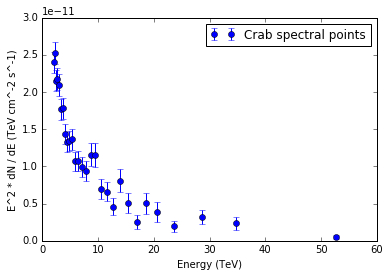

In [157]:
plt.errorbar(energy, energy ** 2 * flux, energy ** 2 * flux_err, fmt='o', label='Crab spectral points')
plt.xlabel('Energy (TeV)')
plt.ylabel('E^2 * dN / dE (TeV cm^-2 s^-1)')
plt.legend()

<li>Fit above data to the Power Law model</li>
<li>Plot log graph</li>

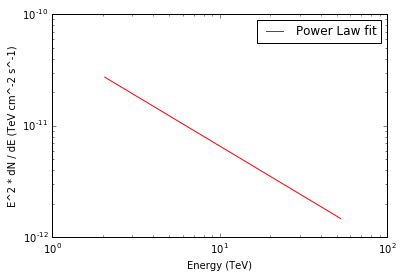

In [160]:
plt.errorbar(energy, energy ** 2 * model(energy), fmt='r-', label='Power Law fit')
plt.loglog()

plt.xlabel('Energy (TeV)')
plt.ylabel('E^2 * dN / dE (TeV cm^-2 s^-1)')
plt.legend()
